In [7]:
import RNA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display

from collections import Counter
from collections import defaultdict
import subprocess
import difflib
import sys
import os
import random
import string
import time

import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN

sys.path.append('../')
from pretty_print_path import print_moves
import findpath_librna
import findpath

In [2]:
sequence = 'CCUCUUGGCAAGGAACUGUUGUAUGACGGUACGUAACGCGCGCCAGAGCUCAAGAUUCAAACGGCGGCUUCAGAACUCAGUCAGGCGAAGAAGCCAGCAC'
s1       = '.......((.(.(.((((((....)))))).).)...))........................((((((((....((......))....)))))).))..'
s2       = '.(((.((((..(..((((((....)))))).).........)))))))...............((((((((....((......))....)))))).))..'

# sequence = 'GAGACCGAUACGAUUAAGCCAGAAUUCCAAUGAUUUGGGGAUCGGGGCUGUUUAGUCUCGUUUAAUCCCGGCGAUGUCUGGGUCAUAUUGUCCGUUAACC' 
# s1       = '(.((.(((((.(((....(((((..(((((....)))(((..(((((((....)))))))......)))...))..)))))))).)))))))).......'
# s2       = '.((((.((.((.....((((.((.((((((....)))))).))..)))).....)).))))))...(((((......)))))..................'

sequence = 'GACUGCCUCAAUUUCCACUUCGCCACAAUGUGAGGUCUCAUUCAACUGCCGCUCAUAAUGGUCGGUCAAUGAGGUCCAUCCGGUCCCUCCAGCCUGGCUA'
s1       = '.....................((((...((..((..((((((..((((((.........)).)))).))))))............).).))...))))..'
s2       = '.....................((((...((.((((.((...(((...((((((......)).))))...)))((.....)))).)).))))...))))..'

sequence = "AACGGGGGCUUCAACUCGCUCAGAAUCAGCGGUAUAGAUAUCCGGGUAGCGGCUUAAAGCAGCACUUUACCAUCGAGGGGGCAAGGAACACUAGCCGACU"
s1       = "..((((....((...(((((.......)))))....))..))))(((((.(.(........)..).)))))....((..(((.((.....)).)))..))"
s2       = "..((((....((...(((((.......)))))....))..))))((((.(.((.....)).).....))))....((..(((.((.....)).)))..))"

In [3]:
# alternative 192
# 807 ! 809 13 
filename_samples = f'./dataset_100_large.csv'
samples_df = pd.read_csv(filename_samples)
for index, row in samples_df.iterrows():
    if index != 417:
        continue
    sequence = row.sequence
    s1 = row.s1
    s2 = row.s2


In [5]:
print(f"sequence = \"{sequence}\"")
print(f"s1 = \"{s1}\"")
print(f"s2 = \"{s2}\"")
print (RNA.bp_distance(s1, s2))

sw = 6
fp = findpath.findpath_single(sequence, s1, s2, search_width_multiplier=sw, mp=False)
result = fp.get_en()/100.0
path = fp.get_path()

print_moves(sequence, s1, s2, path, convert_to_float=True)

sequence = "AACGGGGGCUUCAACUCGCUCAGAAUCAGCGGUAUAGAUAUCCGGGUAGCGGCUUAAAGCAGCACUUUACCAUCGAGGGGGCAAGGAACACUAGCCGACU"
s1 = "..((((...((..((.((((.......))))))..))...))))(((((.((((......))).).)))))....((..(((.((.....)).)))..))"
s2 = "..((((....((...(((((.......)))))....))..))))((((((.(((...))).))....))))....((..(((.((.....)).)))..))"
17
AACGGGGGCUUCAACUCGCUCAGAAUCAGCGGUAUAGAUAUCCGGGUAGCGGCUUAAAGCAGCACUUUACCAUCGAGGGGGCAAGGAACACUAGCCGACU
[   0,    0 ] ..((((...((..((.((((.......))))))..))...))))(((((.((((......))).).)))))....((..(((.((.....)).)))..))  -23.00
[ -10,  -37 ] ..((((....(..((.((((.......))))))..)....))))(((((.((((......))).).)))))....((..(((.((.....)).)))..))  -22.10
[ -11,  -36 ] ..((((.......((.((((.......)))))).......))))(((((.((((......))).).)))))....((..(((.((.....)).)))..))  -24.00
[ -54,  -61 ] ..((((.......((.((((.......)))))).......))))(((((.(((........)).).)))))....((..(((.((.....)).)))..))  -22.70
[ -51,  -65 ] ..((((.......((.((((.......)))))).......))))(((((..((.......

-16.4

{(0, 0, -1910): 0, (-2, -87, -1530): 1, (-3, -86, -1620): 1, (-11, -77, -1420): 2, (-12, -76, -1500): 2, (-9, -79, -1290): 3, (-4, -84, -1190): 3, (-5, -83, -1070): 3, (-6, -82, -980): 3, (-7, -81, -940): 3, (-8, -80, -1240): 3, (13, 81, -840): 4, (12, 82, -940): 4, (8, 87, -740): 5, (9, 86, -930): 5, (10, 85, -1020): 5, (11, 84, -1250): 5, (-14, -75, -800): 6, (14, 80, -1150): 4, (-15, -74, -800): 6, (15, 79, -1250): 4, (-16, -73, -810): 6, (16, 78, -1160): 4, (-29, -36, -1100): 7, (-28, -37, -900): 7, (-27, -38, -750): 7, (-26, -39, -910): 7, (7, 88, -1020): 5, (-18, -71, -847): 6, (-17, -72, -1225): 6}
(0, 0, -1910) 0
(-2, -87, -1530) 1
(-3, -86, -1620) 1
(-11, -77, -1420) 2
(-12, -76, -1500) 2
(-9, -79, -1290) 3
(-4, -84, -1190) 3
(-5, -83, -1070) 3
(-6, -82, -980) 3
(-7, -81, -940) 3
(-8, -80, -1240) 3
(13, 81, -840) 4
(12, 82, -940) 4
(8, 87, -740) 5
(9, 86, -930) 5
(10, 85, -1020) 5
(11, 84, -1250) 5
(-14, -75, -800) 6
(14, 80, -1150) 4
(-15, -74, -800) 6
(15, 79, -1250) 4
(-16,

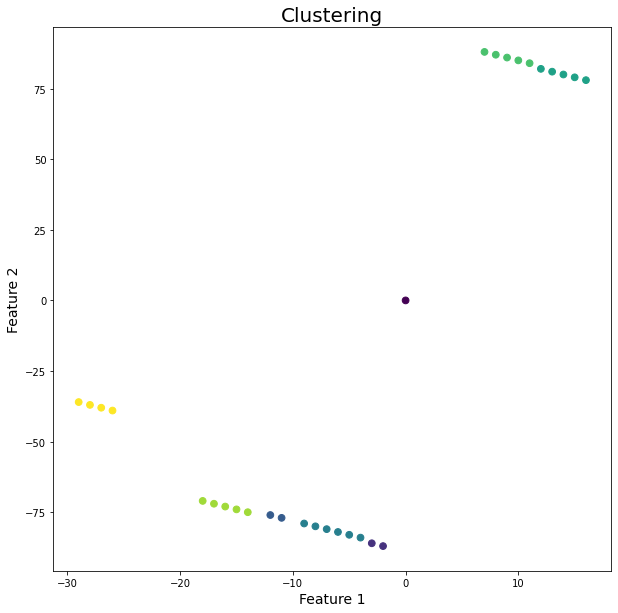

In [20]:
def cluster_moves(inputmoves, absolute_values=False):
    """
    cluster moves with DBscan. needs to include the last move as well...
    """

    if absolute_values:
        moves = np.array([(abs(i[0]), abs(i[1])) for i in inputmoves])
    else:
        moves = np.array([(i[0], i[1]) for i in inputmoves])

    # print ("clustering", moves)
    clustering = DBSCAN(eps=2, min_samples=1).fit(moves)
    
    # generate clustering dict (move-tuple:label, ...)
    return {i[0]:i[1] for i in zip(inputmoves, clustering.labels_)}, clustering.labels_


p = [(i[0], i[1]) for i in path]

p = [(0, 0, -1910), (-2, -87, -1530), (-3, -86, -1620), (-11, -77, -1420), (-12, -76, -1500), (-9, -79, -1290), (-4, -84, -1190), (-5, -83, -1070), (-6, -82, -980), (-7, -81, -940), (-8, -80, -1240), (13, 81, -840), (12, 82, -940), (8, 87, -740), (9, 86, -930), (10, 85, -1020), (11, 84, -1250), (-14, -75, -800), (14, 80, -1150), (-15, -74, -800), (15, 79, -1250), (-16, -73, -810), (16, 78, -1160), (-29, -36, -1100), (-28, -37, -900), (-27, -38, -750), (-26, -39, -910), (7, 88, -1020), (-18, -71, -847), (-17, -72, -1225)]


labeldict, labels = cluster_moves(p)
print (labeldict)

for a,b in labeldict.items():
    print(a,b)

labeldict, labels = cluster_moves(p, absolute_values=True)
print (labeldict)


x = [i[0] for i in p]
y = [i[1] for i in p]

plt.figure(figsize=(10,10))
plt.scatter(x,y,c=labels,s=45)
plt.title('Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

# print (path)
